In [3]:

from wget import download
from os import path
import pandas as pd

# descargamos la base de datos
if not path.exists("movies.csv"):
  download("https://ignaciorlando.github.io/datasets/data-science/movies.csv")
else:
  print("File already exists!")


Let's take a close approach to the dataset!

First of all, read the .csv!

In [5]:
raw_dataset = pd.read_csv("movies.csv")
raw_dataset.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


What do these columns tell us?
INDEX: Mehhhhh, don't need it.
MOVIES: Movie name. Just that!
YEAR: Year when it was released in case of a movie, or the period of time when it was aired if the column belongs to a tv show!.
Genre: Genres.
RATING: Scores that go from 0 to 10. 
ONE-LINE: Short description of what is the serie/movie about.
STARS: List of actors who acted on stage!.
VOTES: Dunno...
Gross: Income?





Lets find out how many null do we have

In [7]:
raw_dataset.isna().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

Not so far! Now lets see in more detail

In [9]:
raw_dataset["MOVIES"].value_counts()

MOVIES
 Bleach: Burîchi                         65
 Mighty Little Bheem                     64
 Avatar: The Last Airbender              61
 La Reina de Indias y el Conquistador    60
 Dexter                                  48
                                         ..
Halston                                   1
Castle Rock                               1
 Totenfrau                                1
 Arcane                                   1
 Shûmatsu no Valkyrie                     1
Name: count, Length: 6817, dtype: int64

WHATTT THEEE HELLL!!! MOVIE NAMES REPEATED!

In [11]:
raw_dataset["ONE-LINE"].value_counts()

ONE-LINE
\nAdd a Plot\n                                                                                                                                                                                                              1265
\nThe Buddis bounce, spin, glide - and giggle. - through their magical world, learning new things and sharing the joy of friendship.                                                                                           8
\nWith kindness, curiosity and childlike wonder, five best friends explore their colourful world and find the extraordinary in everyday things.                                                                                8
\nPlot under wraps.                                                                                                                                                                                                            7
\nPlot unknown.                                                                            

Well... 1265 Add a Plot and 7 unknown

In [12]:
raw_dataset["STARS"].value_counts()

STARS
\n                                                                                                                                       456
\n            \n    Stars:\nEmmanuel Esparza, \nEssined Aponte, \nManuel Navarro, \nÁlvaro Benet\n                                        58
\n    Directors:\nRajiv Chilaka, \nKrishna Mohan Chintapatla\n                                                                            49
\n    Director:\nOliver Driver\n| \n    Stars:\nRorrie D. Travis, \nJasmeet Baduwalia, \nJacqueline Scislowski, \nAbraham Rodriguez\n     21
\n            \n    Star:\nMichael J. Woodard\n                                                                                           19
                                                                                                                                        ... 
\n    Director:\nJoe Johnston\n| \n    Stars:\nSam Neill, \nWilliam H. Macy, \nTéa Leoni, \nAlessandro Nivola\n                            1
\n    D

OH, 456 \n

In [15]:
raw_dataset["RATING"].value_counts()

RATING
7.2    331
7.5    309
7.6    309
7.4    300
7.3    299
      ... 
1.1      1
2.0      1
2.2      1
1.8      1
2.4      1
Name: count, Length: 82, dtype: int64

SCRAPPP EVERYTHING!!!! MAKE A COPY FIRST JEJE


In [100]:
preprocessed_dataset = raw_dataset.copy()

Fix the ONE-LINE COLUMN

In [101]:
# replace false nans
preprocessed_dataset["ONE-LINE"] = preprocessed_dataset["ONE-LINE"].replace(['\nAdd a Plot\n', '\nPlot unknown.', '\nNA.'], pd.NA)

#Delete \n
preprocessed_dataset["ONE-LINE"] = preprocessed_dataset["ONE-LINE"].str.replace("\n", "", regex=False)


In [102]:
preprocessed_dataset["ONE-LINE"].value_counts()

ONE-LINE
The Buddis bounce, spin, glide - and giggle. - through their magical world, learning new things and sharing the joy of friendship.                                                                                        8
With kindness, curiosity and childlike wonder, five best friends explore their colourful world and find the extraordinary in everyday things.                                                                             8
Plot under wraps.                                                                                                                                                                                                         7
Plot kept under wraps.                                                                                                                                                                                                    6
Home for Christmas is back to save the holidays. Find out who was behind the door.                             

NOW FIX STARS!

In [103]:
#Delete \n
preprocessed_dataset["STARS"] = preprocessed_dataset["STARS"].str.replace("\n", "", regex=False)

# replace false nans
preprocessed_dataset["STARS"] = preprocessed_dataset["STARS"].replace('', pd.NA)


In [104]:
preprocessed_dataset["STARS"].value_counts()

STARS
            Stars:Emmanuel Esparza, Essined Aponte, Manuel Navarro, Álvaro Benet                                   58
Directors:Rajiv Chilaka, Krishna Mohan Chintapatla                                                                 49
Director:Oliver Driver|     Stars:Rorrie D. Travis, Jasmeet Baduwalia, Jacqueline Scislowski, Abraham Rodriguez    21
            Star:Michael J. Woodard                                                                                19
            Stars:Maite Perroni, Erik Hayser, Alejandro Speitzer, Jorge Poza                                       17
                                                                                                                   ..
Director:Joe Johnston|     Stars:Sam Neill, William H. Macy, Téa Leoni, Alessandro Nivola                           1
Director:Nicolai Rohde|     Stars:Felix Klare, Romina Küper, Anna Maria Mühe, Robert Palfrader                      1
Director:Orlando von Einsiedel|     Star:Prince Ha

In [126]:
preprocessed_dataset.head()

,MOVIES,YEAR,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Action,Adventure,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,gross_ordinal
0,Blood Red Sky,(2021),6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0,NaN,1,0,...,0,0,0,0,0,0,1,0,0,NaN
1,Masters of the Universe: Revelation,(2021– ),5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0,NaN,1,1,...,0,0,0,0,0,0,0,0,0,NaN
2,The Walking Dead,(2010–2022),8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0,NaN,0,0,...,0,0,0,0,0,0,1,0,0,NaN
3,Rick and Morty,(2013– ),9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0,NaN,0,1,...,0,0,0,0,0,0,0,0,0,NaN
4,Army of Thieves,(2021),NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,NaN,NaN,NaN,1,0,...,0,0,0,0,0,0,0,0,0,NaN


Now fix the Genre column!

In [113]:
#Delete \n
preprocessed_dataset["GENRE"] = preprocessed_dataset["GENRE"].str.replace("\n", "", regex=False)
preprocessed_dataset["GENRE"] = preprocessed_dataset["GENRE"].str.replace(" ","")
split_genres = preprocessed_dataset['GENRE'].str.get_dummies(sep=',')
# Concatenate the one-hot encoded columns with the original DataFrame
preprocessed_dataset = pd.concat([preprocessed_dataset, split_genres], axis=1)
# Drop the original 'GENRE' column if it is no longer needed
preprocessed_dataset.drop('GENRE', axis=1, inplace=True)
# Verify the result


In [131]:
preprocessed_dataset

,MOVIES,YEAR,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Action,Adventure,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,gross_ordinal
0,Blood Red Sky,(2021),6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,"21,062",121.0,NaN,1,0,...,0,0,0,0,0,0,1,0,0,NaN
1,Masters of the Universe: Revelation,(2021– ),5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...","17,870",25.0,NaN,1,1,...,0,0,0,0,0,0,0,0,0,NaN
2,The Walking Dead,(2010–2022),8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...","885,805",44.0,NaN,0,0,...,0,0,0,0,0,0,1,0,0,NaN
3,Rick and Morty,(2013– ),9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...","414,849",23.0,NaN,0,1,...,0,0,0,0,0,0,0,0,0,NaN
4,Army of Thieves,(2021),NaN,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:...,NaN,NaN,NaN,1,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),NaN,<NA>,"Stars:Morgan Taylor Campbell, ...",NaN,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,0,NaN
9995,Arcane,(2021– ),NaN,<NA>,<NA>,NaN,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,NaN
9996,Heart of Invictus,(2022– ),NaN,<NA>,Director:Orlando von Einsiedel| Star:P...,NaN,NaN,NaN,0,0,...,0,0,0,0,1,0,0,0,0,NaN
9997,The Imperfects,(2021– ),NaN,<NA>,Director:Jovanka Vuckovic| Stars:Morga...,NaN,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,0,NaN


In [143]:
preprocessed_dataset["gross_ordinal"].value_counts()

gross_ordinal
1.0     22
2.0     16
3.0     10
4.0      9
10.0     6
8.0      6
12.0     5
15.0     5
5.0      5
Name: count, dtype: int64

In [141]:
revenue_map = {
    '$0.01M' : 1,
    '$0.02M': 2,
    '$0.03M': 3,
    '$0.04M': 4,
    '$0.05M': 5,
    '$0.08M': 8,
    '$0.10M': 10,
    '$0.12M': 12,
    '$0.15M': 15,
}
preprocessed_dataset['gross_ordinal'] = preprocessed_dataset['Gross'].map(revenue_map)
preprocessed_dataset['gross_ordinal'].value_counts().sort_index()


gross_ordinal
1.0     22
2.0     16
3.0     10
4.0      9
5.0      5
8.0      6
10.0     6
12.0     5
15.0     5
Name: count, dtype: int64

Now, lets analize the relation between the rating and the gross.



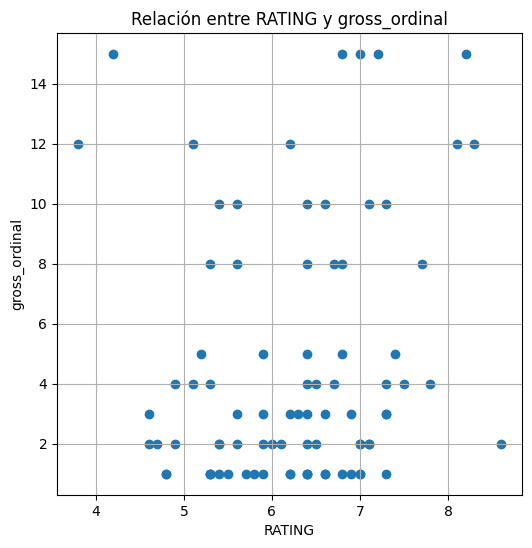

In [145]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

variable_1 = "RATING"
variable_2 = "gross_ordinal"



plt.figure(figsize=(6, 6))  
plt.scatter(preprocessed_dataset[variable_1], preprocessed_dataset[variable_2])
plt.xlabel(variable_1)
plt.ylabel(variable_2)
plt.title("Relación entre {} y {}".format(variable_1, variable_2))

column_data1 = preprocessed_dataset[variable_1]
column_data2 = preprocessed_dataset[variable_2]


#coeficiente_correlacion, _ = stats.pearsonr(column_data1, column_data2)
#plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")


plt.grid(True)
plt.show()